In [1]:
"""
Feature Analysis for Soccer MVPs:

# Feature 2-N - (SPI needs to be scaled otherwise games_played will take precendent over spi - i.e. a player can have a low spi and still do better than other players just because that player played more games - which doesn't make sense)
# SPI ^ (1-N)


Scaler range:
Scaler 1: .92-1
Scaler 2: .84-1
Scaler 3: .78-1
Scaler 4: .72-1
Scaler 5: .66-1
Scaler 6: .62-1
Scaler 7: .57-1
Scaler 8: .52-1
Scaler 9: .47-1
Scaler 10: .44-1


Who were the MLS MVP finalists for every year that includes Fotmob ratings?

Year
Finalists
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić
2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović
2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez
2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi
2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos
2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake
2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander



Analysis 1. Which scaler produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.

Year, scaler, first place, second place, third place
max scaler -> 15

Year, scaler, first place, second place, third place
2024, scaler: 13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5
Notes: Given the players spi's and games played, 7th place this the best Cucho can achieve.


2023, scaler: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3


2022, scaler: 8
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4


2021, scaler: 4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7



2020, scaler: 7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19

2019: scaler: 4
vela	0.916667
ibra	0.709110
martinez	0.619006


2018: scaler: 8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

2017: scaler: 3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

2016: scaler: 4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5


Analysis 2. Which scaler is closest to the ground truth above? Errors don't matter in this case; they just need to match as many players as possible. E.g. two players could be in there correct place, but one may be signifantly wrong.


Analysis 3: Determine the scaler to maker sure the first place contender from the ground truth is correct.

"""

In [1]:
import pandas as pd
from typing import Dict
import matplotlib.pyplot as plt

In [2]:
def create_mvp_analysis_dataframe(test_data: Dict[str, Dict[str, float]], meta_data: Dict[str, float], max_scaler: int):
    df = pd.DataFrame(test_data).T
    df["feature_0_games_played_normalized"] = df["games_played"] / meta_data["max_games_played_mls"]
    for i in range(1, max_scaler):
        df[f"feature_{i}"] = df["spi"] ** i

    for i in range(1, max_scaler):
        df[f"feature_{i}"] = (df["spi"] ** i) / (df[f"spi"].loc[meta_data["player_with_max_spi_mls"]] ** i)
    return df

In [3]:
# 2024 MLS

In [4]:
test_data_mls_2024 = {
    "messi": {
        "spi": 8.29,
        "games_played": 22
    },
    "puig": {
        "spi": 8.17,
        "games_played": 33
    },
    "evander": {
        "spi": 8.06,
        "games_played": 29
    },
    "gauld": {
        "spi": 7.89,
        "games_played": 34
    },
    "pec": {
        "spi": 7.87,
        "games_played": 38
    },
    "acosta": {
        "spi": 7.85,
        "games_played": 35
    },
    "cucho": {
        "spi": 7.80,
        "games_played": 29
    },
    "gil": {
        "spi": 7.72,
        "games_played": 26
    },
    "bentenke": {
        "spi": 7.70,
        "games_played": 30
    },
    "gomez": {
        "spi": 7.68,
        "games_played": 23
    },
    "bounga": {
        "spi": 7.67,
        "games_played": 36
    },
    "forsberg": {
        "spi": 7.64,
        "games_played": 24
    },
    "bogusz": {
        "spi": 7.62,
        "games_played": 36
    },
    "mihlovic": {
        "spi": 7.62,
        "games_played": 30
    },
    "suarez": {
        "spi": 7.59,
        "games_played": 30
    },
    "painstil": {
        "spi": 7.55,
        "games_played": 34
    },
    "alba": {
        "spi": 7.54,
        "games_played": 31
    },
    "gazdag": {
        "spi": 7.51,
        "games_played": 30
    },
    "rodriguez": {
        "spi": 7.49,
        "games_played": 36
    },
    "torres": {
        "spi": 7.46,
        "games_played": 37
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2024[max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2024[max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["spi"])][0]
    }

In [5]:
mvp_mls_2024 = create_mvp_analysis_dataframe(test_data_mls_2024, meta_data, 21)

In [6]:
(mvp_mls_2024["feature_0_games_played_normalized"] * mvp_mls_2024["feature_4"]).sort_values(ascending=False)

,0
puig,0.819220
pec,0.812233
acosta,0.740534
gauld,0.734151
bounga,0.694196
evander,0.681925
bogusz,0.676271
torres,0.638492
rodriguez,0.631289
painstil,0.615552


In [ ]:
"""
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander

13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5
"""

In [26]:
# 2023

In [7]:
test_data_mls_2023 = {
    "gil": {
        "spi": 8.00,
        "games_played": 34
    },
    "zelarayan": {
        "spi": 7.93,
        "games_played": 20
    },
    "almada": {
        "spi": 7.87,
        "games_played": 33
    },
    "herrera": {
        "spi": 7.86,
        "games_played": 35
    },
    "cucho": {
        "spi": 7.85,
        "games_played": 33
    },
    "acosta": {
        "spi": 7.83,
        "games_played": 36
    },
    "puig": {
        "spi": 7.79,
        "games_played": 29
    },
    "bounga": {
        "spi": 7.71,
        "games_played": 36
    },
    "gauld": {
        "spi": 7.70,
        "games_played": 34
    },
    "wagner": {
        "spi": 7.66,
        "games_played": 29
    },
    "a. morris": {
        "spi": 7.66,
        "games_played": 36
    },
    "espinoza": {
        "spi": 7.62,
        "games_played": 35
    },
    "brugman": {
        "spi": 7.61,
        "games_played": 22
    },
    "lowen": {
        "spi": 7.59,
        "games_played": 31
    },
    "paulo": {
        "spi": 7.55,
        "games_played": 35
    },
    "barreal": {
        "spi": 7.55,
        "games_played": 38
    },
    "tolkin": {
        "spi": 7.52,
        "games_played": 30
    },
    "torres": {
        "spi": 7.51,
        "games_played": 33
    },
    "evander": {
        "spi": 7.48,
        "games_played": 27
    },
    "ferreira": {
        "spi": 7.46,
        "games_played": 29
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2023[max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2023[max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["spi"])][0]
    }

In [8]:
mvp_mls_2023 = create_mvp_analysis_dataframe(test_data_mls_2023, meta_data, 16)

In [9]:
mvp_mls_2023

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
gil,8.00,34.0,0.894737,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zelarayan,7.93,20.0,0.526316,0.99125,0.982577,0.973979,0.965457,0.957009,0.948635,0.940335,0.932107,0.923951,0.915866,0.907852,0.899909,0.892034,0.884229,0.876492
almada,7.87,33.0,0.868421,0.98375,0.967764,0.952038,0.936567,0.921348,0.906376,0.891648,0.877158,0.862904,0.848882,0.835088,0.821518,0.808168,0.795035,0.782116
herrera,7.86,35.0,0.921053,0.98250,0.965306,0.948413,0.931816,0.915509,0.899488,0.883747,0.868281,0.853086,0.838157,0.823490,0.809079,0.794920,0.781009,0.767341
cucho,7.85,33.0,0.868421,0.98125,0.962852,0.944798,0.927083,0.909700,0.892643,0.875906,0.859483,0.843368,0.827555,0.812038,0.796812,0.781872,0.767212,0.752827
acosta,7.83,36.0,0.947368,0.97875,0.957952,0.937595,0.917671,0.898171,0.879085,0.860404,0.842120,0.824225,0.806711,0.789568,0.772790,0.756368,0.740295,0.724564
puig,7.79,29.0,0.763158,0.97375,0.948189,0.923299,0.899062,0.875462,0.852481,0.830104,0.808313,0.787095,0.766434,0.746315,0.726724,0.707648,0.689072,0.670984
bounga,7.71,36.0,0.947368,0.96375,0.928814,0.895145,0.862696,0.831423,0.801284,0.772237,0.744244,0.717265,0.691264,0.666206,0.642056,0.618781,0.596350,0.574733
gauld,7.70,34.0,0.894737,0.96250,0.926406,0.891666,0.858229,0.826045,0.795068,0.765253,0.736556,0.708935,0.682350,0.656762,0.632134,0.608429,0.585612,0.563652
wagner,7.66,29.0,0.763158,0.95750,0.916806,0.877842,0.840534,0.804811,0.770607,0.737856,0.706497,0.676471,0.647721,0.620193,0.593834,0.568596,0.544431,0.521293


In [10]:
# What is the minimum scaler to achieve ground truth results?
# 2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga

"""
Analysis 1:

2
acosta	0.907533 Y
gil	0.894737
barreal	0.890664
herrera	0.889098
bounga	0.879929 N,+2
a. morris	0.868553
almada	0.840427 N,+5



3
gil	0.894737
acosta	0.888248 N+1
herrera	0.873539
bounga	0.848032 N+1
barreal	0.840564
a. morris	0.831640
almada	0.826770 N+5



4
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3



8
gil	0.894737
herrera	0.799733
acosta	0.797798 N+2
almada	0.761743 N+2
cucho	0.746393
bounga	0.705073 N+3


Difference between my results and ground truth
-- 8: 7
-- 4: 5
-- 3: 7
-- 2: 7



Best scaler: 4


"""


(mvp_mls_2023["feature_0_games_played_normalized"] * mvp_mls_2023["feature_4"]).sort_values(ascending=False)

,0
gil,0.894737
acosta,0.869373
herrera,0.858252
bounga,0.817291
almada,0.813335
cucho,0.805099
a. morris,0.796295
barreal,0.793282
gauld,0.767889
espinoza,0.758131


In [11]:
# 2022

In [12]:
test_data_mls_2022 = {
    "gil": {
        "spi": 8.00,
        "games_played": 33
    },
    "muhktar": {
        "spi": 7.93,
        "games_played": 34
    },
    "reynoso": {
        "spi": 7.87,
        "games_played": 29
    },
    "zelarayan": {
        "spi": 7.86,
        "games_played": 29
    },
    "acosta": {
        "spi": 7.85,
        "games_played": 32
    },
    "driussi": {
        "spi": 7.83,
        "games_played": 37
    },
    "almada": {
        "spi": 7.79,
        "games_played": 29
    },
    "rubio": {
        "spi": 7.71,
        "games_played": 30
    },
    "pozuelo": {
        "spi": 7.70,
        "games_played": 29
    },
    "gazdag": {
        "spi": 7.66,
        "games_played": 37
    },
    "mihailovic": {
        "spi": 7.66,
        "games_played": 29
    },
    "wagner": {
        "spi": 7.62,
        "games_played": 36
    },
    "osorio": {
        "spi": 7.61,
        "games_played": 23
    },
    "vela": {
        "spi": 7.59,
        "games_played": 35
    },
    "moralez": {
        "spi": 7.55,
        "games_played": 32
    },
    "savarino": {
        "spi": 7.55,
        "games_played": 20
    },
    "lodeiro": {
        "spi": 7.52,
        "games_played": 28
    },
    "ferreira": {
        "spi": 7.51,
        "games_played": 34
    },
    "nwobodo": {
        "spi": 7.48,
        "games_played": 26
    },
    "blake": {
        "spi": 7.07,
        "games_played": 37
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2022[max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2022[max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["spi"])][0]
    }

In [13]:
mvp_mls_2022 = create_mvp_analysis_dataframe(test_data_mls_2022, meta_data, 16)

In [14]:
mvp_mls_2022

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
gil,8.00,33.0,0.891892,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
muhktar,7.93,34.0,0.918919,0.99125,0.982577,0.973979,0.965457,0.957009,0.948635,0.940335,0.932107,0.923951,0.915866,0.907852,0.899909,0.892034,0.884229,0.876492
reynoso,7.87,29.0,0.783784,0.98375,0.967764,0.952038,0.936567,0.921348,0.906376,0.891648,0.877158,0.862904,0.848882,0.835088,0.821518,0.808168,0.795035,0.782116
zelarayan,7.86,29.0,0.783784,0.98250,0.965306,0.948413,0.931816,0.915509,0.899488,0.883747,0.868281,0.853086,0.838157,0.823490,0.809079,0.794920,0.781009,0.767341
acosta,7.85,32.0,0.864865,0.98125,0.962852,0.944798,0.927083,0.909700,0.892643,0.875906,0.859483,0.843368,0.827555,0.812038,0.796812,0.781872,0.767212,0.752827
driussi,7.83,37.0,1.000000,0.97875,0.957952,0.937595,0.917671,0.898171,0.879085,0.860404,0.842120,0.824225,0.806711,0.789568,0.772790,0.756368,0.740295,0.724564
almada,7.79,29.0,0.783784,0.97375,0.948189,0.923299,0.899062,0.875462,0.852481,0.830104,0.808313,0.787095,0.766434,0.746315,0.726724,0.707648,0.689072,0.670984
rubio,7.71,30.0,0.810811,0.96375,0.928814,0.895145,0.862696,0.831423,0.801284,0.772237,0.744244,0.717265,0.691264,0.666206,0.642056,0.618781,0.596350,0.574733
pozuelo,7.70,29.0,0.783784,0.96250,0.926406,0.891666,0.858229,0.826045,0.795068,0.765253,0.736556,0.708935,0.682350,0.656762,0.632134,0.608429,0.585612,0.563652
gazdag,7.66,37.0,1.000000,0.95750,0.916806,0.877842,0.840534,0.804811,0.770607,0.737856,0.706497,0.676471,0.647721,0.620193,0.593834,0.568596,0.544431,0.521293


In [15]:
"""
Analysis 1:

2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake

1
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4

2
driussi	0.957952 N+1
gazdag	0.916806
muhktar	0.902908 N+2
gil	0.891892
wagner	0.882736
vela	0.851471
acosta	0.832736
ferreira	0.809799
blake	0.781014 N+6



-- 1: 8
-- 2: 9


Best scaler: 1

"""

(mvp_mls_2022["feature_0_games_played_normalized"] * mvp_mls_2022["feature_4"]).sort_values(ascending=False)

,0
driussi,0.917671
gil,0.891892
muhktar,0.887176
gazdag,0.840534
acosta,0.801802
wagner,0.800868
vela,0.766432
reynoso,0.734066
zelarayan,0.730342
ferreira,0.713636


In [16]:
# 2021

In [17]:
test_data_mls_2021 = {
    "gil": {
        "spi": 8.14,
        "games_played": 29
    },
    "muhktar": {
        "spi": 7.77,
        "games_played": 33
    },
    "paulo": {
        "spi": 7.80,
        "games_played": 32
    },
    "atuesta": {
        "spi": 7.73,
        "games_played": 24
    },
    "moreno": {
        "spi": 7.65,
        "games_played": 33
    },
    "chicarito": {
        "spi": 7.64,
        "games_played": 21
    },
    "reynoso": {
        "spi": 7.62,
        "games_played": 30
    },
    "russell": {
        "spi": 7.60,
        "games_played": 32
    },
    "rusnak": {
        "spi": 7.58,
        "games_played": 35
    },
    "salloi": {
        "spi": 7.57,
        "games_played": 32
    },
    "chara": {
        "spi": 7.56,
        "games_played": 34
    },
    "price": {
        "spi": 7.55,
        "games_played": 31
    },
    "fragapane": {
        "spi": 7.55,
        "games_played": 20
    },
    "bou": {
        "spi": 7.55,
        "games_played": 31
    },
    "moralez": {
        "spi": 7.54,
        "games_played": 34
    },
    "davis": {
        "spi": 7.52,
        "games_played": 35
    },
    "nathan": {
        "spi": 7.52,
        "games_played": 20
    },
    "ferreira": {
        "spi": 7.53,
        "games_played": 27
    },
    "barco": {
        "spi": 7.48,
        "games_played": 26
    },
    "monteiro": {
        "spi": 7.53,
        "games_played": 29
    },
    "castellanos":
        {
        "spi": 7.52,
        "games_played": 35
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2021[max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2021[max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["spi"])][0]
    }

In [18]:
mvp_mls_2021 = create_mvp_analysis_dataframe(test_data_mls_2021, meta_data, 16)

In [19]:
mvp_mls_2021

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
gil,8.14,29.0,0.828571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
muhktar,7.77,33.0,0.942857,0.954545,0.911157,0.869741,0.830207,0.792470,0.756449,0.722065,0.689244,0.657915,0.628009,0.599464,0.572215,0.546205,0.521378,0.497679
paulo,7.80,32.0,0.914286,0.958231,0.918207,0.879854,0.843103,0.807888,0.774143,0.741808,0.710823,0.681133,0.652683,0.625421,0.599297,0.574265,0.550279,0.527294
atuesta,7.73,24.0,0.685714,0.949631,0.901800,0.856378,0.813243,0.772281,0.733382,0.696443,0.661364,0.628052,0.596418,0.566377,0.537850,0.510759,0.485033,0.460603
moreno,7.65,33.0,0.942857,0.939803,0.883231,0.830063,0.780096,0.733137,0.689005,0.647529,0.608550,0.571917,0.537490,0.505135,0.474727,0.446151,0.419294,0.394054
chicarito,7.64,21.0,0.600000,0.938575,0.880923,0.826812,0.776025,0.728358,0.683618,0.641627,0.602215,0.565224,0.530505,0.497919,0.467334,0.438628,0.411685,0.386397
reynoso,7.62,30.0,0.857143,0.936118,0.876317,0.820336,0.767931,0.718874,0.672951,0.629961,0.589718,0.552046,0.516780,0.483767,0.452863,0.423933,0.396851,0.371500
russell,7.60,32.0,0.914286,0.933661,0.871723,0.813893,0.759901,0.709489,0.662423,0.618478,0.577449,0.539141,0.503375,0.469982,0.438804,0.409694,0.382515,0.357139
rusnak,7.58,35.0,1.000000,0.931204,0.867141,0.807485,0.751933,0.700203,0.652032,0.607175,0.565403,0.526506,0.490284,0.456555,0.425146,0.395897,0.368661,0.343299
salloi,7.57,32.0,0.914286,0.929975,0.864854,0.804293,0.747973,0.695596,0.646888,0.601590,0.559464,0.520287,0.483854,0.449973,0.418464,0.389161,0.361910,0.336567


In [20]:
"""
Analysis 1:

2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos

1
rusnak	0.931204
davis	0.923833
castellanos	0.923833 N+2
chara	0.902211
muhktar	0.900000 N+3
moralez	0.899824
moreno	0.886100
paulo	0.876097 N+5
russell	0.853633
salloi	0.850263 N+6
gil	0.828571 N+10

3
gil	0.828571 Y
muhktar	0.820041 Y
rusnak	0.807485
paulo	0.804438 N+1
davis	0.788461
castellanos	0.788461 N+1
moreno	0.782631
chara	0.778221
moralez	0.772061
russell	0.744131
salloi	0.735354 N+7


4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7


8
gil	0.828571 Y
paulo	0.649895 N+1
muhktar	0.649859 N+1
moreno	0.573776
rusnak	0.565403
chara	0.537762
castellanos	0.530576 N+2
davis	0.530576
russell	0.527953
moralez	0.526485
salloi	0.511510 N+7


9
gil	0.828571 Y
paulo	0.622750 N+1
muhktar	0.620319 N+1
moreno	0.539236
rusnak	0.526506
chara	0.499445
russell	0.492929
castellanos	0.490163 N+3
davis	0.490163
moralez	0.487678
salloi	0.475691 N+7

10
gil	0.828571 Y
paulo	0.596738 N+1
muhktar	0.592123 N+1
moreno	0.506776
rusnak	0.490284
chara	0.463858
russell	0.460229
castellanos	0.452829 N+3
davis	0.452829
moralez	0.451731
reynoso	0.442954
salloi	0.442381 N+8


11
gil	0.828571 Y
paulo	0.596738 N+1
muhktar	0.592123 N+1
moreno	0.506776
rusnak	0.490284
chara	0.463858
russell	0.460229
castellanos	0.452829 N+3
davis	0.452829
moralez	0.451731
reynoso	0.442954
salloi	0.442381 N+8


15
gil	0.828571 Y
paulo	0.482098 N+1
muhktar	0.469240 N+1
moreno	0.371536
rusnak	0.343299
russell	0.326527
chara	0.320532
reynoso	0.318428
atuesta	0.315842
moralez	0.308046
salloi	0.307719 N+7
davis	0.304720
castellanos	0.304720 N+8





Best Scalar: 4



"""

(mvp_mls_2021["feature_0_games_played_normalized"] * mvp_mls_2021["feature_4"]).sort_values(ascending=False)

,0
gil,0.828571
muhktar,0.782767
paulo,0.770837
rusnak,0.751933
moreno,0.735519
castellanos,0.728406
davis,0.728406
chara,0.722771
moralez,0.715152
russell,0.694766


In [21]:
# 2020


In [22]:
test_data_mls_2020 = {
    "blake": {
        "spi": 6.84,
        "games_played": 25
    },
    "rossi": {
        "spi": 7.62,
        "games_played": 21
    },
    "lodiero": {
        "spi": 7.62,
        "games_played": 25
    },
    "pulido": {
        "spi": 7.60,
        "games_played": 14
    },
    "pozuelo": {
        "spi": 7.55,
        "games_played": 25
    },
    "reynoso": {
        "spi": 7.54,
        "games_played": 30
    },
    "molino": {
        "spi": 7.48,
        "games_played": 22
    },
    "quintero": {
        "spi": 7.41,
        "games_played": 22
    },
    "morris": {
        "spi": 7.38,
        "games_played": 27
    },
    "valeri": {
        "spi": 7.37,
        "games_played": 27
    },
    "santos": {
        "spi": 7.36,
        "games_played": 26
    },
    "nani": {
        "spi": 7.36,
        "games_played": 25
    },
    "namli": {
        "spi": 7.32,
        "games_played": 18
    },
    "pavon": {
        "spi": 7.32,
        "games_played": 22
    },
    "ruidiaz": {
        "spi": 7.30,
        "games_played": 22
    },
    "zardes": {
        "spi": 7.27,
        "games_played": 26
    },
    "zelarayan": {
        "spi": 7.27,
        "games_played": 21
    },
    "paulo": {
        "spi": 7.23,
        "games_played": 23
    },
    "russell": {
        "spi": 7.21,
        "games_played": 25
    },
    "przybylko": {
        "spi": 7.21,
        "games_played": 27
    },
    "lod":
        {
        "spi": 7.18,
        "games_played": 30
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2020[max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2020[max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["spi"])][0]
    }

In [23]:
mvp_mls_2020 = create_mvp_analysis_dataframe(test_data_mls_2020, meta_data, 16)

In [24]:
(mvp_mls_2020["feature_0_games_played_normalized"] * mvp_mls_2020["feature_4"]).sort_values(ascending=False)

,0
reynoso,0.958662
lodiero,0.833333
pozuelo,0.803132
morris,0.791859
lod,0.788275
valeri,0.787576
santos,0.754299
nani,0.725287
przybylko,0.721379
zardes,0.718075


In [25]:
"""
Analysis 1:

2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi


1
reynoso	0.989501
lod	0.942257
morris	0.871654 N+1
valeri	0.870472
przybylko	0.851575
santos	0.837095
lodiero	0.833333 N+4
zardes	0.826859
pozuelo	0.825678 N+9
nani	0.804899
russell	0.788495
blake	0.748031 N+10
paulo	0.727428
molino	0.719860
quintero	0.713123
pavon	0.704462
ruidiaz	0.702537
rossi	0.700000 N+13


7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19



8
reynoso	0.853583
lodiero	0.833333 N+1
pozuelo	0.725602 N+2
rossi	0.700000 N+1
morris	0.556882 N+1
molino	0.555266
valeri	0.545670
santos	0.514867
nani	0.495064
quintero	0.482225
pulido	0.448628
zardes	0.428098
lod	0.409772
pavon	0.401461
przybylko	0.392597
ruidiaz	0.385318
russell	0.363516
paulo	0.348623
zelarayan	0.345772
namli	0.328468
blake	0.164944 N+19


Best scaler: 7

"""

'\nAnalysis 1:\n\n2020\tSpain Alejandro Pozuelo\tToronto FC\tAndre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi\n\n\n1\nreynoso\t0.989501\nlod\t0.942257\nmorris\t0.871654 N+1\nvaleri\t0.870472\nprzybylko\t0.851575\nsantos\t0.837095\nlodiero\t0.833333 N+4\nzardes\t0.826859\npozuelo\t0.825678 N+9\nnani\t0.804899\nrussell\t0.788495\nblake\t0.748031 N+10\npaulo\t0.727428\nmolino\t0.719860\nquintero\t0.713123\npavon\t0.704462\nruidiaz\t0.702537\nrossi\t0.700000 N+13\n\n\n7\nreynoso\t0.928784\nlodiero\t0.833333 N+1\npozuelo\t0.781201 N+2\nmorris\t0.719370 Y\nvaleri\t0.712574\nrossi\t0.700000 N+1\nsantos\t0.679692\nlod\t0.659457\nnani\t0.653550\nmolino\t0.644062\nzardes\t0.623603\nprzybylko\t0.611089\nquintero\t0.603037\nrussell\t0.565823\npavon\t0.553598\nruidiaz\t0.543096\npaulo\t0.530750\nzelarayan\t0.503679\npulido\t0.458160\nnamli\t0.452943\nblake\t0.391315 N+19\n\n\n\n8\nreynoso\t0.853583\nlodiero\t0.833333 N+1\npozuelo\t0.725602 N+2\nrossi\t0.700000 N+1\nmorris\t0.556882 N+1\nmol

In [26]:
# 2019


In [27]:
test_data_mls_2019 = {
    "vela": {
        "spi": 8.44,
        "games_played": 33
    },
    "ibra": {
        "spi": 8.04,
        "games_played": 31
    },
    "martinez": {
        "spi": 7.71,
        "games_played": 32
    },
    "atuesta": {
        "spi": 7.62,
        "games_played": 32
    },
    "gil": {
        "spi": 7.53,
        "games_played": 35
    },
    "moralez": {
        "spi": 7.46,
        "games_played": 30
    },
    "pozuelo": {
        "spi": 7.46,
        "games_played": 34
    },
    "lodiero": {
        "spi": 7.45,
        "games_played": 32
    },
    "rossi": {
        "spi": 7.45,
        "games_played": 36
    },
    "gegus": {
        "spi": 7.37,
        "games_played": 31
    },
    "przybylko": {
        "spi": 7.36,
        "games_played": 26
    },
    "rusnak": {
        "spi": 7.32,
        "games_played": 31
    },
    "moreira": {
        "spi": 7.31,
        "games_played": 27
    },
    "monteiro": {
        "spi": 7.31,
        "games_played": 28
    },
    "valeri": {
        "spi": 7.31,
        "games_played": 32
    },
    "morris": {
        "spi": 7.29,
        "games_played": 30
    },
    "nani": {
        "spi": 7.29,
        "games_played": 30
    },
    "ruidiaz": {
        "spi": 7.28,
        "games_played": 22
    },
    "kaye": {
        "spi": 7.26,
        "games_played": 32
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2019[max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2019[max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["spi"])][0]
    }

In [28]:
mvp_mls_2019 = create_mvp_analysis_dataframe(test_data_mls_2019, meta_data, 16)

In [29]:
mvp_mls_2019

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
vela,8.44,33.0,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ibra,8.04,31.0,0.861111,0.952607,0.907459,0.864452,0.823483,0.784455,0.747277,0.711861,0.678124,0.645985,0.615370,0.586205,0.558423,0.531957,0.506746,0.482730
martinez,7.71,32.0,0.888889,0.913507,0.834495,0.762317,0.696382,0.636150,0.581128,0.530864,0.484948,0.443004,0.404687,0.369685,0.337709,0.308500,0.281817,0.257442
atuesta,7.62,32.0,0.888889,0.902844,0.815127,0.735932,0.664431,0.599878,0.541596,0.488976,0.441469,0.398577,0.359853,0.324891,0.293326,0.264827,0.239098,0.215868
gil,7.53,35.0,0.972222,0.892180,0.795985,0.710162,0.633593,0.565279,0.504330,0.449954,0.401440,0.358156,0.319540,0.285087,0.254349,0.226925,0.202458,0.180629
moralez,7.46,30.0,0.833333,0.883886,0.781255,0.690540,0.610359,0.539488,0.476846,0.421478,0.372538,0.329282,0.291047,0.257253,0.227382,0.200980,0.177644,0.157017
pozuelo,7.46,34.0,0.944444,0.883886,0.781255,0.690540,0.610359,0.539488,0.476846,0.421478,0.372538,0.329282,0.291047,0.257253,0.227382,0.200980,0.177644,0.157017
lodiero,7.45,32.0,0.888889,0.882701,0.779162,0.687767,0.607093,0.535882,0.473024,0.417539,0.368562,0.325330,0.287169,0.253485,0.223751,0.197506,0.174339,0.153889
rossi,7.45,36.0,1.000000,0.882701,0.779162,0.687767,0.607093,0.535882,0.473024,0.417539,0.368562,0.325330,0.287169,0.253485,0.223751,0.197506,0.174339,0.153889
gegus,7.37,31.0,0.861111,0.873223,0.762518,0.665848,0.581434,0.507721,0.443354,0.387146,0.338065,0.295206,0.257781,0.225100,0.196562,0.171643,0.149882,0.130881


In [30]:
(mvp_mls_2019["feature_0_games_played_normalized"] * mvp_mls_2019["feature_4"]).sort_values(ascending=False)

,0
vela,0.916667
ibra,0.709110
martinez,0.619006
gil,0.615993
rossi,0.607093
atuesta,0.590606
pozuelo,0.576450
lodiero,0.539638
moralez,0.508633
gegus,0.500679


In [31]:
"""
Analysis 1:

2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez


4
vela	0.916667
ibra	0.709110
martinez	0.619006

Best scaler: 4
"""

'\nAnalysis 1:\n\n2019\tMexico Carlos Vela\tLos Angeles FC\tZlatan Ibrahimović, Josef Martínez\n\n\n4\nvela\t0.916667\nibra\t0.709110\nmartinez\t0.619006\n\nBest scaler: 4\n'

In [32]:
# 2018

In [33]:
test_data_mls_2018 = {
    "vela": {
        "spi": 7.86,
        "games_played": 29
    },
    "ibra": {
        "spi": 7.84,
        "games_played": 27
    },
    "almiron": {
        "spi": 7.79,
        "games_played": 37
    },
    "lodeiro": {
        "spi": 7.71,
        "games_played": 29
    },
    "moralez": {
        "spi": 7.69,
        "games_played": 35
    },
    "piatti": {
        "spi": 7.66,
        "games_played": 32
    },
    "davies": {
        "spi": 7.64,
        "games_played": 31
    },
    "martinez": {
        "spi": 7.63,
        "games_played": 39
    },
    "rooney": {
        "spi": 7.52,
        "games_played": 21
    },
    "blanco": {
        "spi": 7.45,
        "games_played": 37
    },
    "giovinco": {
        "spi": 7.41,
        "games_played": 28
    },
    "osorio": {
        "spi": 7.40,
        "games_played": 30
    },
    "acosta": {
        "spi": 7.38,
        "games_played": 34
    },
    "sanchez": {
        "spi": 7.37,
        "games_played": 38
    },
    "kamara": {
        "spi": 7.35,
        "games_played": 28
    },
    "yotun": {
        "spi": 7.33,
        "games_played": 22
    },
    "quintero": {
        "spi": 7.29,
        "games_played": 27
    },
    "zusi": {
        "spi": 7.29,
        "games_played": 38
    },
    "roger espinoza": {
        "spi": 7.28,
        "games_played": 36
    },
    "valeri": {
        "spi": 7.27,
        "games_played": 38
    },
    "rossi":
        {
        "spi": 7.27,
        "games_played": 33
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2018[max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2018[max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["spi"])][0]
    }

In [34]:
mvp_mls_2018 = create_mvp_analysis_dataframe(test_data_mls_2018, meta_data, 16)

In [35]:
(mvp_mls_2018["feature_0_games_played_normalized"] * mvp_mls_2018["feature_4"]).sort_values(ascending=False)

,0
almiron,0.915370
martinez,0.887990
moralez,0.822278
blanco,0.765724
sanchez,0.753180
vela,0.743590
piatti,0.740134
zusi,0.721006
valeri,0.713126
davies,0.709546


In [36]:
"""
Analysis 1:

2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović

1
martinez	0.970738 Y
almiron	0.940269 Y
sanchez	0.913616
zusi	0.903699
valeri	0.901220
blanco	0.899230
moralez	0.878026
roger espinoza	0.854962
acosta	0.818555
piatti	0.799635
rossi	0.782638
davies	0.772623
vela	0.743590
lodeiro	0.729399
osorio	0.724212
ibra	0.690546 N+13


5
almiron	0.907218 N+1
martinez	0.862005 N+1
moralez	0.804493
vela	0.743590
blanco	0.725781
piatti	0.721301
sanchez	0.706226
davies	0.689686
ibra	0.683544 N+6

7
almiron	0.891131 N+1
martinez	0.812295 N+1
moralez	0.770070
vela	0.743590
piatti	0.685061
ibra	0.680070 N+3

8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

10
almiron	0.867533 N+1
vela	0.743590
martinez	0.743053 N+2
moralez	0.721176
ibra	0.674892 N+2


11
almiron	0.859807 N+1
vela	0.743590
martinez	0.721310 N+2
moralez	0.705578
ibra	0.673175 N+2


15
almiron	0.829585 N+1
vela	0.743590
ibra	0.666349 Y
moralez	0.646488
martinez	0.640516 N+4

best scaler: 8


"""

'\nAnalysis 1:\n\n2018\tVenezuela Josef Martínez\tAtlanta United FC\tMiguel Almirón, Zlatan Ibrahimović\n\n1\nmartinez\t0.970738 Y\nalmiron\t0.940269 Y\nsanchez\t0.913616\nzusi\t0.903699\nvaleri\t0.901220\nblanco\t0.899230\nmoralez\t0.878026\nroger espinoza\t0.854962\nacosta\t0.818555\npiatti\t0.799635\nrossi\t0.782638\ndavies\t0.772623\nvela\t0.743590\nlodeiro\t0.729399\nosorio\t0.724212\nibra\t0.690546 N+13\n\n\n5\nalmiron\t0.907218 N+1\nmartinez\t0.862005 N+1\nmoralez\t0.804493\nvela\t0.743590\nblanco\t0.725781\npiatti\t0.721301\nsanchez\t0.706226\ndavies\t0.689686\nibra\t0.683544 N+6\n\n7\nalmiron\t0.891131 N+1\nmartinez\t0.812295 N+1\nmoralez\t0.770070\nvela\t0.743590\npiatti\t0.685061\nibra\t0.680070 N+3\n\n8\nalmiron\t0.883195 N+1\nmartinez\t0.788526 N+1\nmoralez\t0.753414\nvela\t0.743590\nibra\t0.678340 N+2\n\n10\nalmiron\t0.867533 N+1\nvela\t0.743590\nmartinez\t0.743053 N+2\nmoralez\t0.721176\nibra\t0.674892 N+2\n\n\n11\nalmiron\t0.859807 N+1\nvela\t0.743590\nmartinez\t0.72131

In [37]:
# 2017

In [38]:
test_data_mls_2017 = {
    "villa": {
        "spi": 7.72,
        "games_played": 33
    },
    "martinez": {
        "spi": 7.47,
        "games_played": 21
    },
    "giovinco": {
        "spi": 7.47,
        "games_played": 29
    },
    "rusnak": {
        "spi": 7.46,
        "games_played": 30
    },
    "nguyen": {
        "spi": 7.46,
        "games_played": 31
    },
    "dzemaili": {
        "spi": 7.45,
        "games_played": 22
    },
    "roldan": {
        "spi": 7.44,
        "games_played": 38
    },
    "almiron": {
        "spi": 7.42,
        "games_played": 31
    },
    "zusi": {
        "spi": 7.41,
        "games_played": 25
    },
    "victor vasquez": {
        "spi": 7.39,
        "games_played": 36
    },
    "altidore": {
        "spi": 7.39,
        "games_played": 31
    },
    "pirez": {
        "spi": 7.36,
        "games_played": 33
    },
    "valeri": {
        "spi": 7.35,
        "games_played": 34
    },
    "moralez": {
        "spi": 7.33,
        "games_played": 31
    },
    "federico higuain": {
        "spi": 7.30,
        "games_played": 31
    },
    "nagbe": {
        "spi": 7.29,
        "games_played": 29
    },
    "piatti": {
        "spi": 7.29,
        "games_played": 28
    },
    "lodeiro": {
        "spi": 7.28,
        "games_played": 38
    },
    "nikolic": {
        "spi": 7.21,
        "games_played": 35
    },
    "alessandrini": {
        "spi": 7.21,
        "games_played": 30
    },
    "kljestan":
        {
        "spi": 7.21,
        "games_played": 35
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2017[max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2017[max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["spi"])][0]
    }

In [39]:
mvp_mls_2017 = create_mvp_analysis_dataframe(test_data_mls_2017, meta_data, 16)

In [40]:
(mvp_mls_2017["feature_0_games_played_normalized"] * mvp_mls_2017["feature_4"]).sort_values(ascending=False)

,0
villa,0.868421
roldan,0.862626
victor vasquez,0.795477
lodeiro,0.790781
valeri,0.735149
pirez,0.717418
nguyen,0.711319
kljestan,0.700739
nikolic,0.700739
almiron,0.696185


In [41]:
"""
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić

1
roldan	0.963731
lodeiro	0.943005
victor vasquez	0.906872
villa	0.868421 N+2
nikolic	0.860206 N+2
kljestan	0.860206
valeri	0.851854 N+6

2
roldan	0.928777
lodeiro	0.889259
villa	0.868421 N+1
victor vasquez	0.868107
valeri	0.811027 N+4
nikolic	0.803379 N+3

3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

4
villa	0.868421 N+1
roldan	0.862626
victor vasquez	0.795477
lodeiro	0.790781
valeri	0.735149 N+4
pirez	0.717418
nguyen	0.711319
kljestan	0.700739
nikolic	0.700739 N+6

best scaler: 3



"""

'\n2017\tArgentina Diego Valeri\tPortland Timbers\tDavid Villa, Nemanja Nikolić\n\n1\nroldan\t0.963731\nlodeiro\t0.943005\nvictor vasquez\t0.906872\nvilla\t0.868421 N+2\nnikolic\t0.860206 N+2\nkljestan\t0.860206\nvaleri\t0.851854 N+6\n\n2\nroldan\t0.928777\nlodeiro\t0.889259\nvilla\t0.868421 N+1\nvictor vasquez\t0.868107\nvaleri\t0.811027 N+4\nnikolic\t0.803379 N+3\n\n3\nroldan\t0.895090\nvilla\t0.868421 Y\nlodeiro\t0.838576\nvictor vasquez\t0.830999\nvaleri\t0.772157 N+4\npirez\t0.752509\nnikolic\t0.750306 N+4\n\n4\nvilla\t0.868421 N+1\nroldan\t0.862626\nvictor vasquez\t0.795477\nlodeiro\t0.790781\nvaleri\t0.735149 N+4\npirez\t0.717418\nnguyen\t0.711319\nkljestan\t0.700739\nnikolic\t0.700739 N+6\n\nbest scaler: 3\n\n\n\n'

In [42]:
# 2016

In [43]:
test_data_mls_2016 = {
    "giovinco": {
        "spi": 7.79,
        "games_played": 34
    },
    "alonso": {
        "spi": 7.71,
        "games_played": 38
    },
    "bradley": {
        "spi": 7.44,
        "games_played": 30
    },
    "kljestan": {
        "spi": 7.41,
        "games_played": 34
    },
    "feihaber": {
        "spi": 7.39,
        "games_played": 31
    },
    "diaz": {
        "spi": 7.33,
        "games_played": 27
    },
    "dos santos": {
        "spi": 7.32,
        "games_played": 31
    },
    "nagbe": {
        "spi": 7.31,
        "games_played": 27
    },
    "kaka": {
        "spi": 7.29,
        "games_played": 24
    },
    "valeri": {
        "spi": 7.29,
        "games_played": 30
    },
    "mccarty": {
        "spi": 7.29,
        "games_played": 29
    },
    "wright-phillips": {
        "spi": 7.27,
        "games_played": 36
    },
    "piatti": {
        "spi": 7.25,
        "games_played": 37
    },
    "molino": {
        "spi": 7.22,
        "games_played": 30
    },
    "ola kamara": {
        "spi": 7.21,
        "games_played": 25
    },
    "hedges": {
        "spi": 7.21,
        "games_played": 28
    },
    "villa": {
        "spi": 7.20,
        "games_played": 35
    },
    "roger espinoza": {
        "spi": 7.18,
        "games_played": 31
    },
    "pirlo": {
        "spi": 7.18,
        "games_played": 16
    },
    "altidore": {
        "spi": 7.16,
        "games_played": 29
    },
    "lampard":
        {
        "spi": 7.12,
        "games_played": 21
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2016[max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2016[max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["spi"])][0]
    }

In [44]:
mvp_mls_2016 = create_mvp_analysis_dataframe(test_data_mls_2016, meta_data, 16)

In [45]:
(mvp_mls_2016["feature_0_games_played_normalized"] * mvp_mls_2016["feature_4"]).sort_values(ascending=False)

,0
alonso,0.959550
giovinco,0.894737
kljestan,0.732518
piatti,0.730500
wright-phillips,0.718632
villa,0.672148
feihaber,0.660703
bradley,0.656870
dos santos,0.636023
valeri,0.605477


In [46]:
"""
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan

1
alonso	0.989730
piatti	0.906189
giovinco	0.894737
wright-phillips	0.884129 N+2
villa	0.851294 N+4
kljestan	0.851091 N+3

2
alonso	0.979566
giovinco	0.894737
piatti	0.843372
wright-phillips	0.825112 N+2
kljestan	0.809575 N+2
villa	0.786818 N+5

3
alonso	0.969507
giovinco	0.894737
piatti	0.784910
kljestan	0.770083 N+1
wright-phillips	0.770034 N+3
villa	0.727226 N+5

4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5

best scalar: 4
"""

'\n2016\tSpain David Villa\tNew York City FC\tBradley Wright-Phillips, Sacha Kljestan\n\n1\nalonso\t0.989730\npiatti\t0.906189\ngiovinco\t0.894737\nwright-phillips\t0.884129 N+2\nvilla\t0.851294 N+4\nkljestan\t0.851091 N+3\n\n2\nalonso\t0.979566\ngiovinco\t0.894737\npiatti\t0.843372 \nwright-phillips\t0.825112 N+2\nkljestan\t0.809575 N+2\nvilla\t0.786818 N+5\n\n3\nalonso\t0.969507 \ngiovinco\t0.894737\npiatti\t0.784910\nkljestan\t0.770083 N+1\nwright-phillips\t0.770034 N+3\nvilla\t0.727226 N+5\n\n4\nalonso\t0.959550\ngiovinco\t0.894737\nkljestan\t0.732518 Y\npiatti\t0.730500\nwright-phillips\t0.718632 N+3\nvilla\t0.672148 N+5\n\nbest scalar: 4\n'

In [47]:
"""
Results for Analysis 1:


Analysis 1. Which scalar produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.

Year, scalar, first place, second place, third place

Year, scalar, first place, second place, third place
2024, scalar: 13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5
Notes: Given the players spi's and games played, 7th place this the best Cucho can achieve.


2023, scalar: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3


2022, scalar: 8
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4


2021, scalar: 4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7



2020, scalar: 7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19

2019: scalar: 4
vela	0.916667
ibra	0.709110
martinez	0.619006


2018: scalar: 8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

2017: scalar: 3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

2016: scalar: 4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5


Ground Truth Finalists
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić
2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović
2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez
2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi
2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos
2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake
2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander


"""

"\nResults for Analysis 1:\n\n\nAnalysis 1. Which scalar produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.\n\nYear, scalar, first place, second place, third place\n\nYear, scalar, first place, second place, third place\n2024, scalar: 13\npuig\t0.718469 \nmessi\t0.578947 N+1\nevander\t0.529372 Y\npec\t0.508701\ngauld\t0.470422\nacosta\t0.453295\ncucho\t0.345649 N+5\nNotes: Given the players spi's and games played, 7th place this the best Cucho can achieve. \n\n\n2023, scalar: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)\ngil\t0.894737 \nacosta\t0.869373 N+1\nherrera\t0.858252\nbounga\t0.817291 N+1\nalmada\t0.813335 N+3\n\n\n2022, scalar: 8\ndriussi\t0.978750 N+1\ngazdag\t0.957500\nwagner\t0.926757\nmuhktar\t0.910878 N+3\nvela\t0.897466\ngil\t0.891892\nblake\t0.883750 N+4\n\n\n2021, scalar: 4\ngil\t0.828571 Y\nmuhktar\t0.782767 

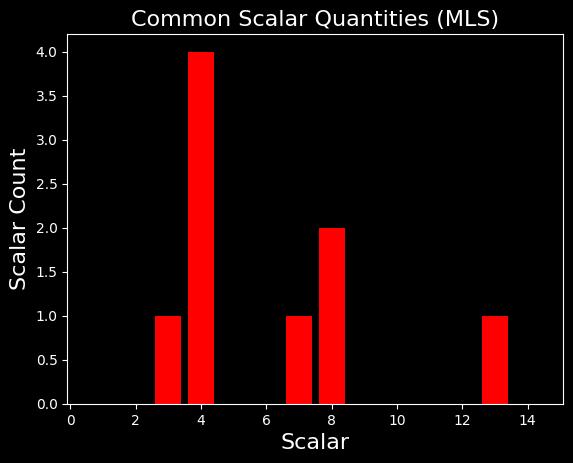

In [48]:
# Bar Chart - Showcase the common scalar quanties over a distribution

plt.style.use('dark_background')
plt.bar(
    x=[i for i in range(1,15)],
    height=[0,0,1,4,0,0,1,2,0,0,0,0,1,0],
    color="red"
    )
plt.title(label="Common Scalar Quantities (MLS)", fontsize=16)
plt.xlabel(xlabel="Scalar", fontsize=16)
plt.ylabel(ylabel="Scalar Count", fontsize=16)
# plt.show()
plt.savefig("common_mls_scalar_quantities.png")

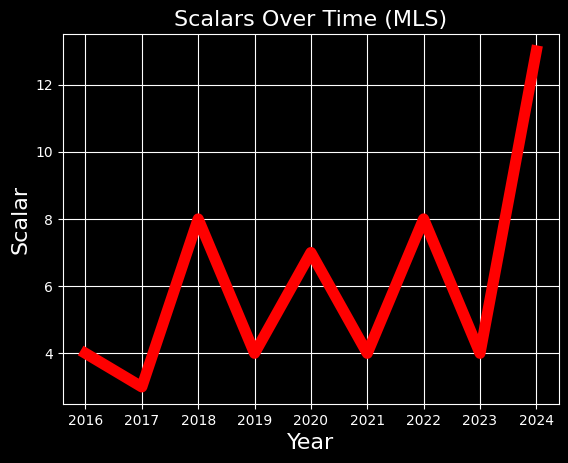

In [5]:
# Line Plot - View the scalers over the past several years

plt.style.use('dark_background')
plt.plot(
    ["2016", "2017", "2018", "2019" ,"2020", "2021", "2022", "2023", "2024"],
    [4,3,8,4,7,4,8,4,13],
    linewidth=8,
    color="red",
    )
plt.title(label="Scalars Over Time (MLS)", fontsize=16)
plt.xlabel(xlabel="Year", fontsize=16)
plt.ylabel(ylabel="Scalar", fontsize=16)
plt.grid()
# plt.show()
plt.savefig("scalars_over_time_mls.png")

In [ ]:

"""
Ad-Hoc Analysis #1: Which scalar produces the smallest error in identifying top MLS players?

After running tests on MVP candidates from 2016 to 2024 using my model, I found that a scalar of 4 most consistently matched the actual MVP finalist lists.

What’s interesting? This scalar strikes a good balance: it’s aggressive enough to highlight the elite tier of players, but not so strict that it misses genuine top performers.

Here are the model’s top picks using scalar = 4

I chose to narrow the final results to approximately the top 2% of players who played at least half the games in a given season.

This 2% corresponds to the upper tail of a normal distribution—specifically, those beyond 2 standard deviations—meaning the players listed below outperformed roughly 98% of their peers.

Here are the final results with the most common scalar (4):


Computed Winners:

2016: # of players: 191
1. alonso	0.959550
2. giovinco	0.894737
3. kljestan	0.732518
4. piatti	0.730500

2017: # of players: 285
1. villa	0.868421
2. roldan	0.862626
3. victor vasquez	0.795477
4. lodeiro	0.790781
5. valeri	0.735149
6. pirez	0.717418

2018: # of players: 283
1. almiron	0.915370
2. martinez	0.887990
3. moralez	0.822278
4. blanco	0.765724
5. sanchez	0.753180
6. vela	0.743590

2019: # of players: 301
1. vela	0.916667
2. ibra	0.709110
3. martinez	0.619006
4. gil	0.615993
5. rossi	0.607093
6. atuesta	0.590606
7. pozuelo	0.576450

2020: # of players: 355
1. reynoso	0.958662
2. lodiero	0.833333
3. pozuelo	0.803132
4. morris	0.791859
5. lod	0.788275
6. valeri	0.787576
7. santos	0.754299
8. nani	0.725287

2021: # of players: 401
1. gil	0.828571
2. muhktar	0.782767
3. paulo	0.770837
4. rusnak	0.751933
5. moreno	0.735519
6. castellanos	0.728406
7. davis	0.728406
8. chara	0.722771
9. moralez	0.715152

2022: # of players: 393
1. driussi	0.917671
2. gil	0.891892
3. muhktar	0.887176
4. gazdag	0.840534
5. acosta	0.801802
6. wagner	0.800868
7. vela	0.766432
8. reynoso	0.734066
9. zelarayan	0.730342

2023: # of players: 382
1. gil	0.894737
2. acosta	0.869373
3. herrera	0.858252
4. bounga	0.817291
5. almada	0.813335
6. cucho	0.805099
7. a. morris	0.796295
8. barreal	0.793282
9. gauld	0.767889

2024: # of players: 414
1. puig	0.819220
2. pec	0.812233
3. acosta	0.740534
4. gauld	0.734151
5. bounga	0.694196
6. evander	0.681925
7. bogusz	0.676271
8. torres	0.638492
9. rodriguez	0.631289
10. painstil	0.615552




"""